In [1]:
import uproot as up 
import numpy as np
import pandas as pd
import awkward as ak
from matplotlib.colors import LogNorm
from matplotlib.pylab import figure, cm
import math
import matplotlib.pyplot as plt

print(' uproot version: ', up.__version__)


 uproot version:  5.3.10


In [2]:
file = up.open("qt_ntuple.root")
events = file["Jet_Tree"]
print('Number of Branches inside Jet_Tree = ', len(events.keys()))
events.keys()


Number of Branches inside Jet_Tree =  10


['jet_pt',
 'jet_px',
 'jet_py',
 'jet_pz',
 'jet_E',
 'jet_eta',
 'jet_phi',
 'jet_mass',
 'jet_nConstituents',
 'jet_PartonTruthLabelID']

In [3]:
df = events.arrays(library="pd") #pip install awkward-pandas
df.head()


,jet_pt,jet_px,jet_py,jet_pz,jet_E,jet_eta,jet_phi,jet_mass,jet_nConstituents,jet_PartonTruthLabelID
0,"[70531.953125, 48116.99609375, 33069.40234375,...","[-68377.15625, 45101.6953125, -31974.462890625...","[-17300.8828125, 16765.513671875, -8439.139648...","[-2230010.25, -333780.34375, -268698.59375, 33...","[2231159.75, 337257.15625, 270747.90625, 33504...","[-4.147092819213867, -2.635150194168091, -2.79...","[-2.8937723636627197, 0.35589802265167236, -2....","[12364.1494140625, 4221.23291015625, 3450.9887...","[2, 6, 3, 3]","[1, 5, 5, 2]"
1,"[55547.35546875, 53744.61328125, 38019.53125, ...","[-2418.339111328125, 52954.58984375, -14759.84...","[-55494.6875, 9181.2314453125, 35037.57421875,...","[-91894.1796875, 78198.7734375, 20848.109375, ...","[107524.8046875, 94994.3984375, 43397.46484375...","[-1.2774360179901123, 1.1695435047149658, 0.52...","[-1.6143466234207153, 0.1716727316379547, 1.96...","[5615.666015625, 4516.9921875, 1792.0845947265...","[10, 6, 2, 2, 4, 5, 10]","[5, -1, -1, 1, -1, 5, 5]"
2,"[60969.22265625, 57916.43359375, 51263.0273437...","[-49000.22265625, 5477.29931640625, 29219.8222...","[-36279.8046875, 57656.8515625, -42120.0664062...","[260263.703125, -3650.705810546875, 23930.6875...","[267403.0625, 58153.546875, 56921.72265625, 46...","[2.157918691635132, -0.06299235671758652, 0.45...","[-2.504263401031494, 1.4760823249816895, -0.96...","[7068.25439453125, 3767.4853515625, 6285.42919...","[16, 5, 6, 2, 5, 1, 2, 2, 3]","[2, 5, 5, -1, -1, 21, -1, 5, 21]"
3,"[187796.203125, 120024.3046875, 60549.828125, ...","[-40327.8984375, 119019.4921875, 9697.29003906...","[-183415.03125, 15498.2119140625, 59768.253906...","[-439809.59375, 40459.3828125, 21065.5234375, ...","[478757.6875, 126674.4453125, 64111.0703125, 4...","[-1.5868785381317139, 0.33101511001586914, 0.3...","[-1.7872248888015747, 0.12948715686798096, 1.4...","[22561.6953125, 1902.77294921875, 437.24783325...","[7, 2, 2, 6, 2, 3]","[5, -1, 21, 3, -1, 5]"
4,"[75304.359375, 42984.23046875, 25983.75390625,...","[43445.55859375, -34037.9453125, -878.71649169...","[-61507.96875, -26249.99609375, 25968.890625, ...","[236901.953125, -178895.453125, 9153.083984375...","[248661.25, 184131.609375, 27559.1796875, 2164...","[1.8636093139648438, -2.1332457065582275, 0.34...","[-0.9558277726173401, -2.4846622943878174, 1.6...","[6256.10107421875, 7295.39208984375, 757.58056...","[7, 14, 2, 2, 7, 4, 1, 6]","[5, 1, 21, 1, 5, 5, -1, 2]"


In [4]:
def flatten_awkward_array(row):
    return pd.Series({col: list(row[col]) for col in row.index})


In [5]:
#Flatten the dataframe, so now you have a dataframe of jets instead of dataframe of events
df_flat = df.apply(flatten_awkward_array, axis=1).explode(list(df.columns)).reset_index(drop=True)


In [6]:
bjets       = df_flat [ df_flat["jet_PartonTruthLabelID"] == 5 ]
failed_jets = df_flat [ df_flat["jet_PartonTruthLabelID"] == -1]
light_jets = df_flat[ (df_flat["jet_PartonTruthLabelID"] != 5) & (df_flat["jet_PartonTruthLabelID"] != -1)]



In [7]:
print("# of bjets:       ", len(bjets))
print("# of light jets:  ", len(light_jets))
print("# of failed jets: ", len(failed_jets))


# of bjets:        2509
# of light jets:   2413
# of failed jets:  1701


In [8]:
print("% of bjets:       ", round( len(bjets)/len(df_flat), 3 ) )
print("% of light jets:  ", round( len(light_jets)/len(df_flat), 3 ) )
print("% of failed jets: ", round( len(failed_jets)/len(df_flat), 3 ) )


% of bjets:        0.379
% of light jets:   0.364
% of failed jets:  0.257


Text(0.5, 0, 'phi')

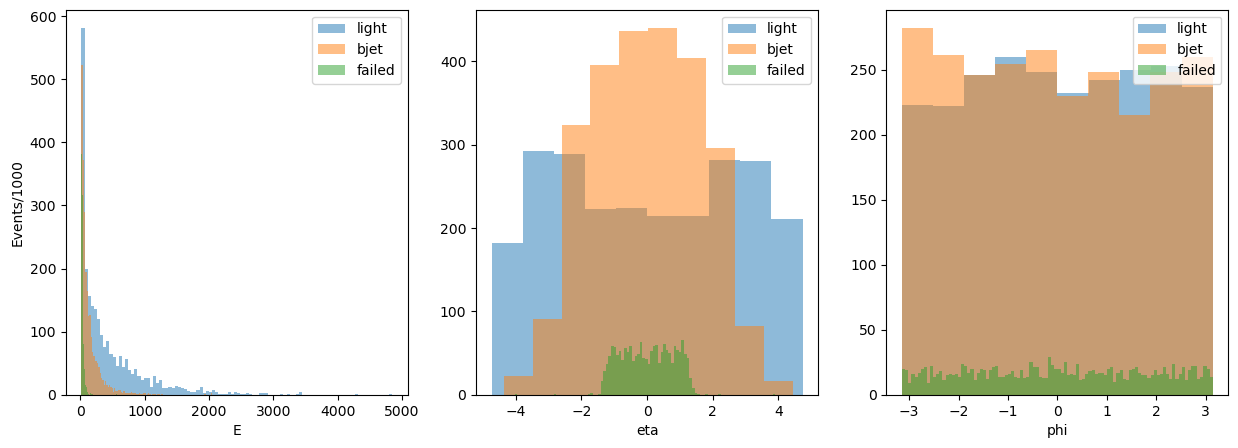

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.hist(light_jets['jet_E']/1e3,bins=100,alpha=0.5,label='light')
plt.hist(bjets['jet_E']/1e3,bins=100,alpha=0.5,label='bjet')

plt.hist(failed_jets['jet_E']/1e3,bins=100,alpha=0.5,label='failed')
plt.legend()
plt.xlabel('E')
plt.ylabel('Events/1000')

plt.subplot(132)
plt.hist(light_jets['jet_eta'],alpha=0.5,label='light')
plt.hist(bjets['jet_eta'],alpha=0.5,label='bjet')

plt.hist(failed_jets['jet_eta'],bins=100,alpha=0.5,label='failed')
plt.legend()
plt.xlabel('eta')

plt.subplot(133)
plt.hist(light_jets['jet_phi'],alpha=0.5,label='light')
plt.hist(bjets['jet_phi'],alpha=0.5,label='bjet')
plt.hist(failed_jets['jet_phi'],bins=100,alpha=0.5,label='failed')


#plt.xlim(-2, 22)
plt.legend()
plt.xlabel('phi')


Text(0.5, 0, 'phi')

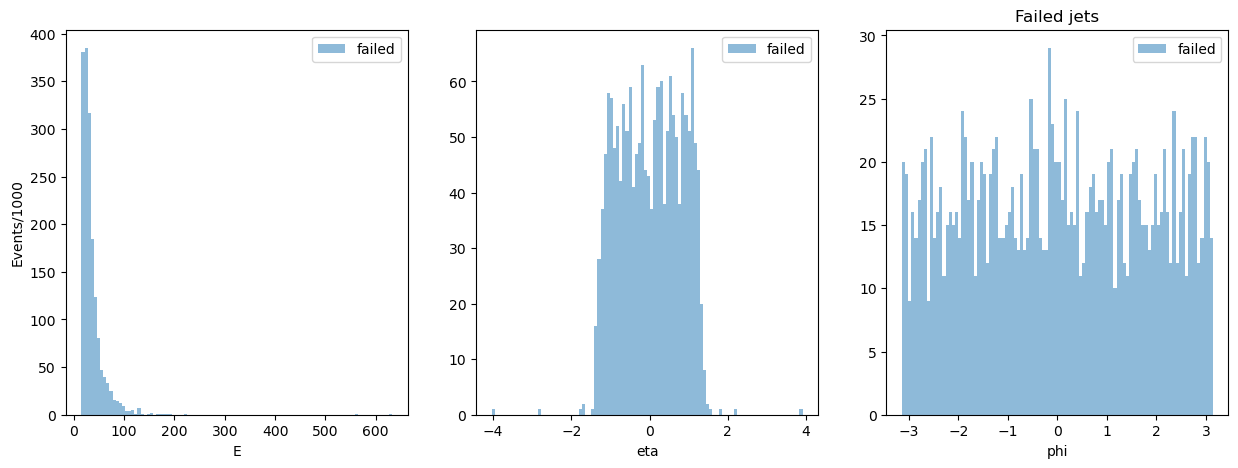

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.hist(failed_jets['jet_E']/1e3,bins=100,alpha=0.5,label='failed')
plt.legend()
plt.xlabel('E')
plt.ylabel('Events/1000')

plt.subplot(132)
plt.hist(failed_jets['jet_eta'],bins=100,alpha=0.5,label='failed')
plt.legend()
plt.xlabel('eta')

plt.subplot(133)
plt.hist(failed_jets['jet_phi'],bins=100,alpha=0.5,label='failed')

plt.title("Failed jets")
plt.legend()
plt.xlabel('phi')


Text(0.5, 0, 'jetConstituents')

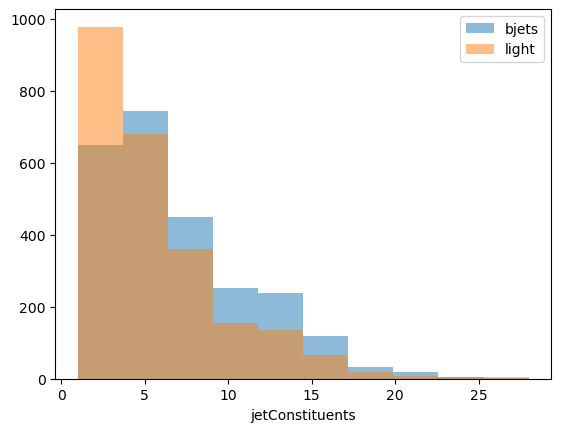

In [11]:
plt.hist(bjets['jet_nConstituents'],bins=10,alpha=0.5,label='bjets')
plt.hist(light_jets['jet_nConstituents'],bins=10,alpha=0.5,label='light')

plt.legend()
plt.xlabel('jetConstituents')


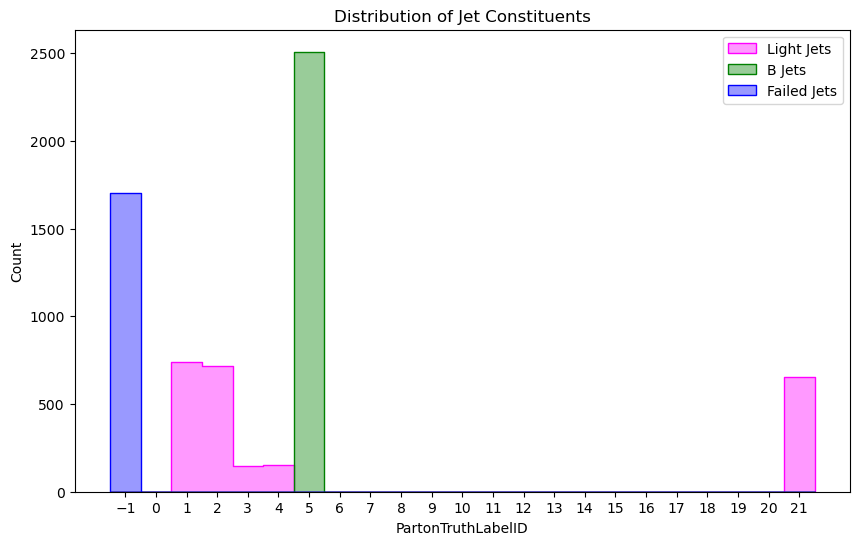

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the maximum value of PartonTruthLabelID in the datasets
max_val = max(light_jets['jet_PartonTruthLabelID'].max(), bjets['jet_PartonTruthLabelID'].max(), failed_jets['jet_PartonTruthLabelID'].max())
bins = np.arange(-1, max_val + 1.5) - 0.5
# Plotting the histograms
plt.figure(figsize=(10, 6))

sns.histplot(light_jets['jet_PartonTruthLabelID'], color='magenta', label='Light Jets', stat="count", alpha=0.4, element= "step", bins = bins)
sns.histplot(bjets['jet_PartonTruthLabelID'], color='green', label='B Jets', stat="count", alpha=0.4, element= "step", bins = bins)
sns.histplot(failed_jets['jet_PartonTruthLabelID'], color='blue', label='Failed Jets', stat="count", alpha=0.4, element= "step", bins = bins)

plt.xticks(np.arange(-1, max_val + 1, 1))
plt.title('Distribution of Jet Constituents')
plt.xlabel('PartonTruthLabelID')
plt.ylabel('Count')
plt.legend()
plt.show()


In [8]:
file = up.open("cluster_info_phiExtended.root")
events = file["Jet_Tree"]
print('Number of Branches inside Jet_Tree = ', len(events.keys()))
events.keys()


Number of Branches inside Jet_Tree =  4


['clus_E', 'clus_Et', 'clus_eta', 'clus_phi']

In [9]:
df_clusters = events.arrays(library="pd") #pip install awkward-pandas
# df_clusters


In [15]:
# # Initialize the "jet_nClusters" column with empty lists
# df_clusters['jet_nClusters'] = [[] for _ in range(len(df_clusters))]

# for k in range(len(df_clusters)):
#     nClus_arr = np.array( [ len(i) for i in df_clusters.iloc[k]["clus_Et"] ] )
#     df_clusters.at[k, "jet_nClusters"] = nClus_arr

# df_clusters.head()


In [10]:
for key in df_clusters.keys():
    df[key] = df_clusters[key]
    df_flat = df.apply(flatten_awkward_array, axis=1).explode(list(df.columns)).reset_index(drop=True)

df_flat.head()


,jet_pt,jet_px,jet_py,jet_pz,jet_E,jet_eta,jet_phi,jet_mass,jet_nConstituents,jet_PartonTruthLabelID,clus_E,clus_Et,clus_eta,clus_phi
0,70531.953125,-68377.15625,-17300.882812,-2230010.25,2231159.75,-4.147093,-2.893772,12364.149414,2.0,1.0,"[1391252.875, 1105804.75]","[46472.0, 33869.30859375]","[-4.091978073120117, -4.178731918334961]","[-3.041106939315796, -2.6957662105560303]"
1,48116.996094,45101.695312,16765.513672,-333780.34375,337257.15625,-2.63515,0.355898,4221.23291,6.0,5.0,"[275179.84375, 93191.2734375, 32546.693359375,...","[38744.078125, 13053.7509765625, 5635.11621093...","[-2.6486010551452637, -2.6537840366363525, -2....","[0.3379049301147461, 0.4096496105194092, 0.388..."
2,33069.402344,-31974.462891,-8439.139648,-268698.59375,270747.90625,-2.791894,-2.883543,3450.98877,3.0,5.0,"[206833.578125, 125238.234375, 11658.658203125]","[25725.703125, 15238.005859375, 1112.182006835...","[-2.7736809253692627, -2.7958505153656006, -3....","[-2.942595958709717, -2.7456564903259277, 3.11..."
3,15907.993164,8889.208008,-13192.658203,334666.15625,335048.1875,3.740023,-0.977872,1665.597168,3.0,2.0,"[347313.25, 33947.49609375, 8987.7666015625]","[16041.6357421875, 2181.275146484375, 508.5821...","[3.767652988433838, 3.437018871307373, 3.56433...","[-0.9725562930107117, -1.0684860944747925, -0...."
4,55547.355469,-2418.339111,-55494.6875,-91894.179688,107524.804688,-1.277436,-1.614347,5615.666016,10.0,5.0,"[68644.03125, 43242.25, 20195.65625, 2487.9309...","[37254.1484375, 21748.138671875, 9875.78613281...","[-1.2208912372589111, -1.310187816619873, -1.3...","[-1.672230839729309, -1.5038944482803345, -1.6..."


In [17]:
# Initialize the "jet_nClusters" column with empty lists
df_flat['jet_nClusters'] = [[] for _ in range(len(df_flat))]

for k in range(len(df_flat)):
    df_flat.at[k, "jet_nClusters"] = len(df_flat.iloc[k]["clus_eta"])

df_flat.head()


,jet_pt,jet_px,jet_py,jet_pz,jet_E,jet_eta,jet_phi,jet_mass,jet_nConstituents,jet_PartonTruthLabelID,clus_E,clus_Et,clus_eta,clus_phi,jet_nClusters
0,70531.953125,-68377.15625,-17300.882812,-2230010.25,2231159.75,-4.147093,-2.893772,12364.149414,2.0,1.0,"[1391252.875, 1105804.75]","[46472.0, 33869.30859375]","[-4.091978073120117, -4.178731918334961]","[-3.041106939315796, -2.6957662105560303]",2
1,48116.996094,45101.695312,16765.513672,-333780.34375,337257.15625,-2.63515,0.355898,4221.23291,6.0,5.0,"[275179.84375, 93191.2734375, 32546.693359375,...","[38744.078125, 13053.7509765625, 5635.11621093...","[-2.6486010551452637, -2.6537840366363525, -2....","[0.3379049301147461, 0.4096496105194092, 0.388...",6
2,33069.402344,-31974.462891,-8439.139648,-268698.59375,270747.90625,-2.791894,-2.883543,3450.98877,3.0,5.0,"[206833.578125, 125238.234375, 11658.658203125]","[25725.703125, 15238.005859375, 1112.182006835...","[-2.7736809253692627, -2.7958505153656006, -3....","[-2.942595958709717, -2.7456564903259277, 3.11...",3
3,15907.993164,8889.208008,-13192.658203,334666.15625,335048.1875,3.740023,-0.977872,1665.597168,3.0,2.0,"[347313.25, 33947.49609375, 8987.7666015625]","[16041.6357421875, 2181.275146484375, 508.5821...","[3.767652988433838, 3.437018871307373, 3.56433...","[-0.9725562930107117, -1.0684860944747925, -0....",3
4,55547.355469,-2418.339111,-55494.6875,-91894.179688,107524.804688,-1.277436,-1.614347,5615.666016,10.0,5.0,"[68644.03125, 43242.25, 20195.65625, 2487.9309...","[37254.1484375, 21748.138671875, 9875.78613281...","[-1.2208912372589111, -1.310187816619873, -1.3...","[-1.672230839729309, -1.5038944482803345, -1.6...",10


In [11]:
bjets = df_flat[df_flat['jet_PartonTruthLabelID']==5]
light_jets = df_flat[ (df_flat["jet_PartonTruthLabelID"] != 5) & (df_flat["jet_PartonTruthLabelID"] != -1)]


In [12]:
bjets.keys()


Index(['jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_E', 'jet_eta', 'jet_phi',
       'jet_mass', 'jet_nConstituents', 'jet_PartonTruthLabelID', 'clus_E',
       'clus_Et', 'clus_eta', 'clus_phi'],
      dtype='object')

In [12]:
def convert_awkward_to_numpy(df, column_names):
    for column_name in column_names:
        df[column_name] = df[column_name].apply(lambda x: ak.to_numpy(x) if isinstance(x, ak.highlevel.Array) else x)
    return df


In [13]:
columns = ['clus_E', 'clus_phi', 'clus_eta', 'clus_Et']
bjets = convert_awkward_to_numpy(bjets.copy(), columns)


In [14]:
columns = ['clus_E', 'clus_phi', 'clus_eta', 'clus_Et']
light_jets = convert_awkward_to_numpy(light_jets.copy(), columns)


In [16]:
min_list = []
for idx in range(len(bjets['clus_E'])):
    min_list.append(np.min(bjets.iloc[idx]['clus_E']))
print("Minimum cluster E: ", np.min(min_list))


Minimum cluster E:  0.35652923583984375


In [24]:
min_list = []
for idx in range(len(light_jets['clus_E'])):
    min_list.append(np.min(light_jets.iloc[idx]['clus_E']))
print("Minimum cluster E: ", np.min(min_list))


Minimum cluster E:  0.025137867778539658


In [15]:
def extend_phi(phi, jet_phi):
    """
    If a jet center is close to either 0 or 2*pi, its constituents could be on the other side
    of the periodicity line. This takes care of this problem by remapping phi to be either
    above 2*pi or below zero.
    """
    if abs(jet_phi + np.pi)<1.: # phi close to -pi
        return phi-2*np.pi*int(abs(phi-np.pi) <1-abs(jet_phi + np.pi))
    elif abs(jet_phi - np.pi)<1.: # phi close to pi
        return phi+2*np.pi*int(abs(-phi-np.pi) < 1-abs(jet_phi - np.pi)) 
    else: 
        return phi
    


def translate(jet_eta,jet_phi, arr_clusEta, arr_clusPhi):
    """
    center the image about jet_eta and jet_phi
    """
    tmp_clusEta = arr_clusEta
    tmp_clusPhi = arr_clusPhi

    for i,e in enumerate(arr_clusPhi):
         tmp_clusPhi[i] = extend_phi(tmp_clusPhi[i], jet_phi)

    for i,e in enumerate(arr_clusEta):
        tmp_clusEta[i] = arr_clusEta[i] - jet_eta
        tmp_clusPhi[i] = tmp_clusPhi[i] - jet_phi

    return (tmp_clusEta, tmp_clusPhi)


In [16]:
def pixel_edges(jet_size=0.4, pixel_size=(0.055, 0.055), border_size=0.001):
#def pixel_edges(jet_size=1.0, pixel_size=(0.2, 0.2), border_size=0.5):
#def pixel_edges(jet_size=1.0, pixel_size=(0.1, 0.1), border_size=0.0):
    """Return pixel edges required to contain all clusters.
    border_size is interpreted as a fraction of the jet_size
    """
    im_edge = (1. + border_size) * jet_size
    return (np.arange(-im_edge, im_edge+pixel_size[0], pixel_size[0]), np.arange(-im_edge, im_edge+pixel_size[1], pixel_size[1]))

def createImage(data, edges, cutoff=0.1):
    """Return eta-phi histogram of transverse energy deposits.
    Optionally set all intensities below cutoff to zero.
    """
    image, _, _ = np.histogram2d(
        data[0],data[1],
        bins=(edges[0], edges[1]),
        weights=data[2] * (data[2] > cutoff))
    return image

# def normalize(histo):
#     """
#     Normalize picture in [0,multi] range, with integer steps. E.g. multi=255 for 256 steps.
#     """
#     return (histo/np.max(abs(histo)*255)).astype(int)


In [19]:
pack = zip(
           bjets['jet_E'],
           bjets['jet_eta'],
           bjets['jet_phi'],
           bjets['clus_E'],
           bjets['clus_eta'],
           bjets['clus_phi']
           )    
b_images = []
for i, (jet_E, jet_eta,jet_phi, clus_E, clus_eta, clus_phi) in enumerate(pack):
    
    clus_E   = clus_E / jet_E * 1000 # jet image weights = fraction of jet E in image cell
    
   # Center the image about jet_eta and jet_phi
    clus_eta,clus_phi = translate(jet_eta,jet_phi,clus_eta,clus_phi)
    etaedges,phiedges = pixel_edges()

    img = createImage((clus_eta,clus_phi,clus_E), pixel_edges(), )
    # img = normalize(img)
    b_images.append(img)


In [20]:
num_images = len(b_images)
print(f"There are {num_images} images of shape {b_images[0].shape} in the list.")


There are 2509 images of shape (15, 15) in the list.


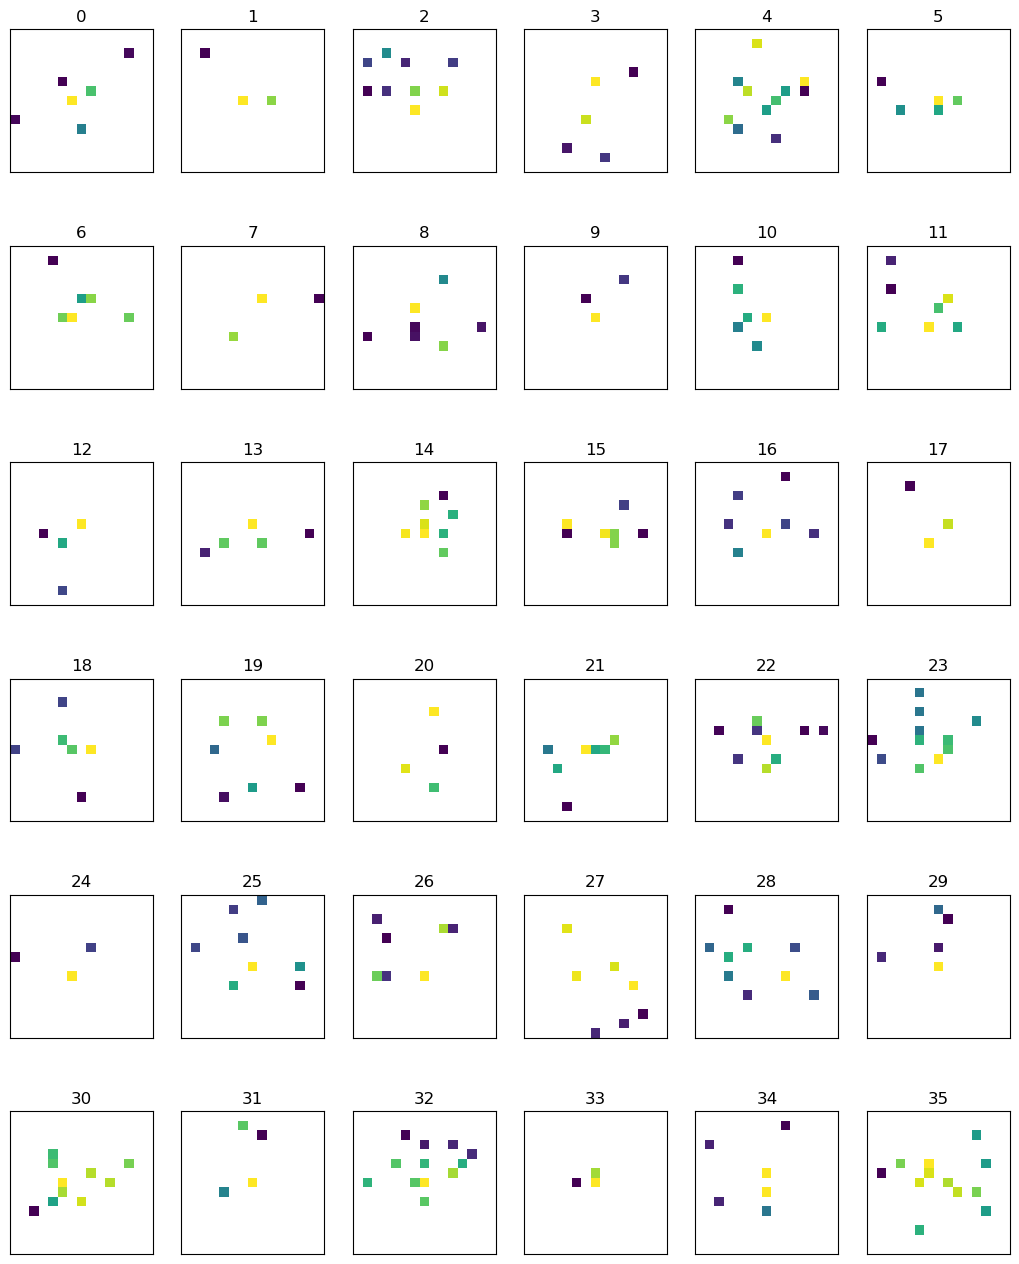

In [21]:
def plot_gallery(images, titles, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1,)
        plt.imshow(images[i], norm=LogNorm())
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
plot_gallery(b_images, range(len(b_images)), n_row=6, n_col=6)


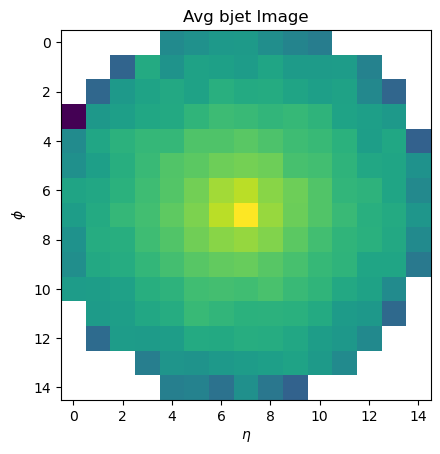

In [22]:
b_avg = sum(b_images)/len(b_images)

import matplotlib.pyplot as plt

# plot the third image in the list
im1=plt.imshow(b_avg, norm=LogNorm())
plt.title("Avg bjet Image")
# plt.colorbar(im1)
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')
# plt.xticks()
# show the plot
plt.show()


In [23]:
pack = zip(
           light_jets['jet_E'],
           light_jets['jet_eta'],
           light_jets['jet_phi'],
           light_jets['clus_E'],
           light_jets['clus_eta'],
           light_jets['clus_phi']
           )    


In [24]:
light_images = []
for i, (jet_E,jet_eta,jet_phi, clus_E, clus_eta, clus_phi) in enumerate(pack):
    
    clus_E   = clus_E / jet_E * 1000 # jet image weights = fraction of jet E in image cell
    
   # Center the image about jet_eta and jet_phi
    clus_eta,clus_phi = translate(jet_eta,jet_phi,clus_eta,clus_phi)
    # etaedges,phiedges = pixel_edges()

    img = createImage((clus_eta,clus_phi,clus_E), pixel_edges(), )
    light_images.append(img)

num_images = len(light_images)
print(f"There are {num_images} images of shape {light_images[0].shape} in the list.")


There are 2413 images of shape (15, 15) in the list.


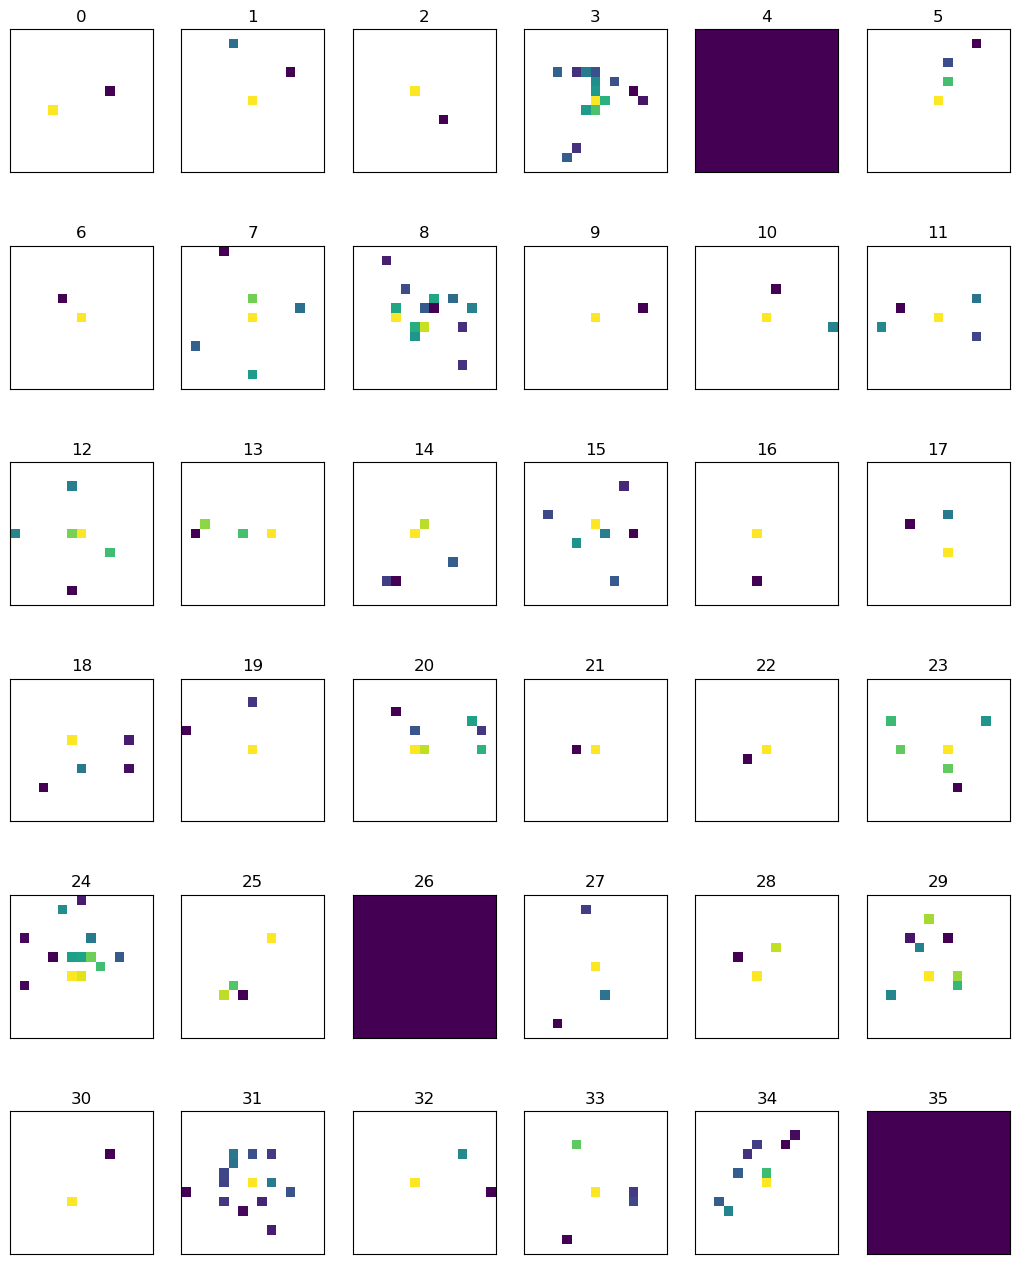

In [25]:
plot_gallery(light_images, range(len(light_images)), n_row=6, n_col=6)


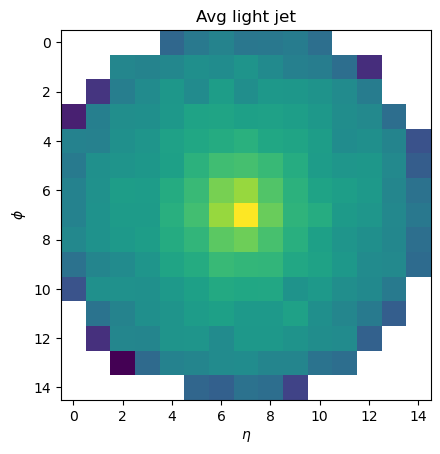

In [26]:
light_avg = sum(light_images)/len(light_images)

import matplotlib.pyplot as plt

# plot the third image in the list
im1=plt.imshow(light_avg, norm=LogNorm())
plt.title("Avg light jet")
# plt.colorbar(im1)
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')
# plt.xticks()
# show the plot
plt.show()


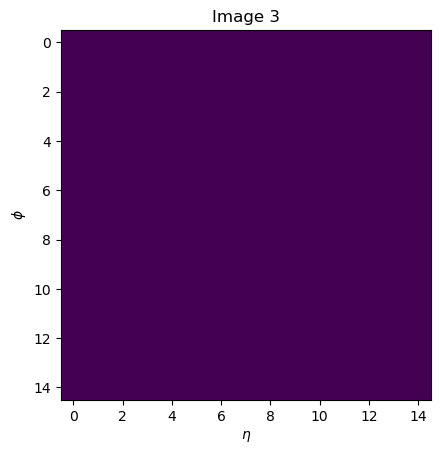

In [36]:
import matplotlib.pyplot as plt

# plot the third image in the list
im1=plt.imshow(light_images[4], norm=LogNorm())
plt.title("Image 3")
# plt.colorbar(im1)
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')
# plt.xticks()
# show the plot
plt.show()


### Input Variables for BDT Model

$$  \Psi_{R} = \frac{1}{{jetE}} \sum_{\text{constituents}} E_{constituent} \cdot \Delta R  $$

where $ \Delta R$  is a calculated between the jet center and the jet constituent

In [27]:
def extend_phi(phi, jet_phi):
    """
    If a jet center is close to either -pi or +pi, its constituents could be on the other side
    of the periodicity line. This takes care of this problem by remapping phi to be either
    above pi or -pi. (remember: phi is between -pi and pi. Check out any histogram)
    """
    if abs(jet_phi + np.pi)<1.: # jet_phi close to -π
        #then subract 2 π from phi but if pi other side of periodicity
        return phi - 2 * np.pi * int(abs(phi-np.pi) <1-abs(jet_phi + np.pi))
    elif abs(jet_phi - np.pi)<1.: # phi close to pi
        return phi+2*np.pi*int(abs(-phi-np.pi) < 1-abs(jet_phi - np.pi)) 
    else: 
        return phi

def deltaR (phi1, phi2, eta1, eta2):
    phi1 = extend_phi(phi1, phi2)
    dphi = np.abs(phi1-phi2)
    if dphi > np.pi:
        dphi = 2 * np.pi - dphi
    return math.sqrt( ( dphi )**2 + ( eta1 - eta2 )**2 )

def psi_R ( jet_E, jet_eta, jet_phi, clus_E, clus_eta, clus_phi ):
    tmp = 0
    for idx in range(len(clus_E)):
        tmp += (1/jet_E) * clus_E[idx] * deltaR(clus_phi[idx], jet_phi, clus_eta[idx], jet_eta)
    return tmp


In [38]:
bjets.keys()


Index(['jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_E', 'jet_eta', 'jet_phi',
       'jet_mass', 'jet_nConstituents', 'jet_PartonTruthLabelID', 'clus_E',
       'clus_Et', 'clus_eta', 'clus_phi', 'jet_nClusters'],
      dtype='object')

In [28]:
bjets['psi_R'] = bjets.copy().apply(lambda row: psi_R(row['jet_E'], row['jet_eta'], row['jet_phi'], row['clus_E'], row['clus_eta'], row['clus_phi']), axis=1)
light_jets['psi_R'] = light_jets.copy().apply(lambda row: psi_R(row['jet_E'], row['jet_eta'], row['jet_phi'], row['clus_E'], row['clus_eta'], row['clus_phi']), axis=1)


In [29]:
print("for bjets, min: ", np.min(bjets["psi_R"]), "max: ", np.max(bjets["psi_R"]))
print("for light jets, min: ", np.min(light_jets["psi_R"]), "max: ", np.max(light_jets["psi_R"]))


for bjets, min:  0.10789932656294644 max:  13.143243591628995
for light jets, min:  0.07433942660501604 max:  13.690543944473143


Text(0.5, 0, 'distribution of psi_R')

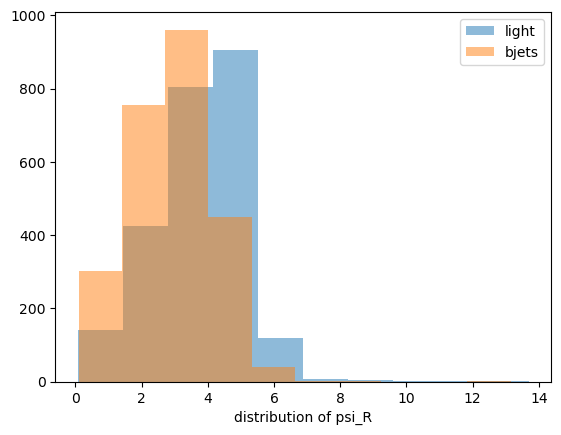

In [30]:
import matplotlib.pyplot as plt

plt.hist(light_jets['psi_R'],bins=10,alpha=0.5,label='light')
plt.hist(bjets['psi_R'],bins=10,alpha=0.5,label='bjets')
plt.legend()
plt.xlabel('distribution of psi_R')


$$  p_{far, \, \hat{j}} = \frac{\vec{p}_{Farthest} \cdot \vec{p}_{jet}} {p_{jet}}   $$

where: $ jet p_x, p_y, p_z$ are easily calculated from the jet TLorentz Vector.

$ \vec{p}_{Farthest} $ is the momentum vector of the farthest jet constituent/
using the assumption that Topoclusters are massless pseudoparticles, and that clus_eta and clus_phi are good enough approximations for the momentum direction relative to the nominal interaction point.

$p_x = E \, sin\theta \, cos\phi$

$p_y = E \, sin\theta \, sin\phi$

where $sin\theta = \frac{2 e^{-\eta}}{1+e^{-2\eta}} $

$p_z = E \, cos\theta$ , where $cos\theta = \frac{1-e^{-2\eta}}{1+e^{-2\eta}}$


In [31]:
def pfar_proj(jet_px, jet_py, jet_pz, jet_eta, jet_phi, clus_E, clus_eta, clus_phi):
    """
    calculate the momentum component of the farthest jet constituent in the jet momentum direction
    """
    li = []
    for idx in range(len(clus_E)):
        tmp = deltaR(clus_phi[idx], jet_phi, clus_eta[idx], jet_eta)
        li.append(tmp) # make a list of deltaR values

    arg = np.argmax(li) # get the argument for the farthest jet 
    pjet = math.sqrt(jet_px**2 + jet_py**2 + jet_pz**2)
    sine = 2 * math.exp(-clus_eta[arg]) / (1 + math.exp(-2 * clus_eta[arg]))
    cosine = (1 - math.exp(-2 * clus_eta[arg])) / (1 + math.exp(-2 * clus_eta[arg]) )

    proj = (clus_E[arg]/pjet) * (jet_px * sine * math.cos(clus_phi[arg]) + jet_py * sine * math.sin(clus_phi[arg]) + jet_pz * cosine)

    return abs(proj)
    

In [33]:
bjets['pfar_proj'] = bjets.copy().apply( lambda row: pfar_proj( row['jet_px'], row['jet_py'], row['jet_pz'], row['jet_eta'], row['jet_phi'] , row['clus_E'], row['clus_eta'], row['clus_phi']), axis=1)
light_jets['pfar_proj'] = light_jets.copy().apply( lambda row: pfar_proj( row['jet_px'], row['jet_py'], row['jet_pz'], row['jet_eta'], row['jet_phi'] , row['clus_E'], row['clus_eta'], row['clus_phi']), axis=1)


In [44]:
bjets.keys()


Index(['jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_E', 'jet_eta', 'jet_phi',
       'jet_mass', 'jet_nConstituents', 'jet_PartonTruthLabelID', 'clus_E',
       'clus_Et', 'clus_eta', 'clus_phi', 'jet_nClusters', 'psi_R',
       'pfar_proj'],
      dtype='object')

Text(0.5, 0, 'distribution of pfar_proj')

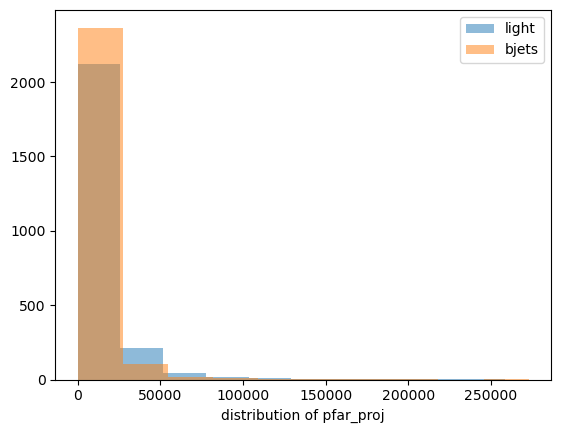

In [34]:
import matplotlib.pyplot as plt

plt.hist(light_jets['pfar_proj'],bins=10,alpha=0.5,label='light')
plt.hist(bjets['pfar_proj'],bins=10,alpha=0.5,label='bjets')
plt.legend()
plt.xlabel('distribution of pfar_proj')


Text(0.5, 0, 'distribution of pfar_proj')

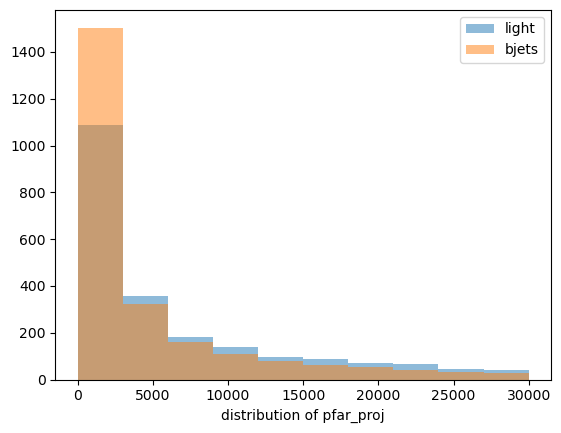

In [61]:
import matplotlib.pyplot as plt

plt.hist(light_jets['pfar_proj'],bins=10,range=(0, 30000),alpha=0.5,label='light')
plt.hist(bjets['pfar_proj'],bins=10,range=(0, 30000),alpha=0.5,label='bjets')
plt.legend()
plt.xlabel('distribution of pfar_proj')


In [46]:
bjets[["psi_R", "pfar_proj"]].describe()


,psi_R,pfar_proj
count,2509.000000,2509.000000
mean,2.937336,6730.589151
std,1.216754,14804.887845
min,0.107899,0.017102
25%,2.095555,129.070966
50%,2.957575,1648.516292
75%,3.791842,6919.913898
max,13.143244,272750.046941


In [47]:
light_jets[["psi_R", "pfar_proj"]].describe()


,psi_R,pfar_proj
count,2413.000000,2413.000000
mean,3.748039,10803.346434
std,1.342363,19432.505491
min,0.074339,0.018364
25%,2.847942,703.915888
50%,3.897011,3743.628237
75%,4.700092,13342.551514
max,13.690544,258385.622185


In [50]:
bjets.head()


,jet_pt,jet_px,jet_py,jet_pz,jet_E,jet_eta,jet_phi,jet_mass,jet_nConstituents,jet_PartonTruthLabelID,clus_E,clus_Et,clus_eta,clus_phi,psi_R,pfar_proj
1,48116.996094,45101.695312,16765.513672,-333780.34375,337257.15625,-2.63515,0.355898,4221.23291,6.0,5.0,"[275179.84375, 93191.2734375, 32546.693359375,...","[38744.078125, 13053.7509765625, 5635.11621093...","[-0.013450860977172852, -0.01863384246826172, ...","[-0.01799309253692627, 0.053751587867736816, 0...",3.320167,138.231982
2,33069.402344,-31974.462891,-8439.139648,-268698.59375,270747.90625,-2.791894,-2.883543,3450.98877,3.0,5.0,"[206833.578125, 125238.234375, 11658.658203125]","[25725.703125, 15238.005859375, 1112.182006835...","[0.018213510513305664, -0.0039560794830322266,...","[-0.059052467346191406, 0.13788700103759766, -...",5.101854,14695.788707
4,55547.355469,-2418.339111,-55494.6875,-91894.179688,107524.804688,-1.277436,-1.614347,5615.666016,10.0,5.0,"[68644.03125, 43242.25, 20195.65625, 2487.9309...","[37254.1484375, 21748.138671875, 9875.78613281...","[0.05654478073120117, -0.03275179862976074, -0...","[-0.05788421630859375, 0.11045217514038086, -0...",2.602255,2217.912422
9,16835.740234,5146.401367,16029.869141,25880.021484,30925.765625,1.215226,1.260141,1784.750854,5.0,5.0,"[23796.4375, 16316.51953125, 235.0, 499.640533...","[13807.615234375, 8082.04736328125, 144.748474...","[-0.07513034343719482, 0.11255228519439697, -0...","[0.012344002723693848, -0.026721954345703125, ...",2.328666,2611.396722
10,15286.169922,-6921.32666,-13629.461914,-87327.46875,88699.265625,-2.443437,-2.040681,2793.808105,10.0,5.0,"[19939.3671875, 25224.33984375, 16816.9140625,...","[3329.357177734375, 3961.141845703125, 3219.71...","[-0.03258252143859863, -0.09476399421691895, 0...","[-0.09315943717956543, 0.2374894618988037, -0....",4.727653,1110.517928


In [55]:
# Create bdt_df by selecting the columns from bjets
bdt_df = bjets[['psi_R', 'pfar_proj']].copy()
bdt_df['is_bjet'] = 1


# Assign the columns from light_jets to bdt_df
light_jets_df = light_jets[['psi_R', 'pfar_proj']].copy()
light_jets_df['is_bjet'] = 0

bdt_df = pd.concat([bdt_df, light_jets_df], ignore_index=True)


In [56]:
bdt_df


,psi_R,pfar_proj,is_bjet
0,3.320167,138.231982,1
1,5.101854,14695.788707,1
2,2.602255,2217.912422,1
3,2.328666,2611.396722,1
4,4.727653,1110.517928,1
...,...,...,...
4917,2.905077,547.473496,0
4918,4.543359,5696.607432,0
4919,3.578247,147.950313,0
4920,3.287226,3723.843277,0


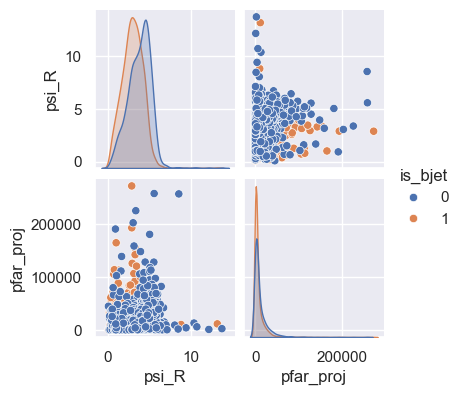

In [58]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
sns.pairplot(bdt_df, hue="is_bjet", height=2)


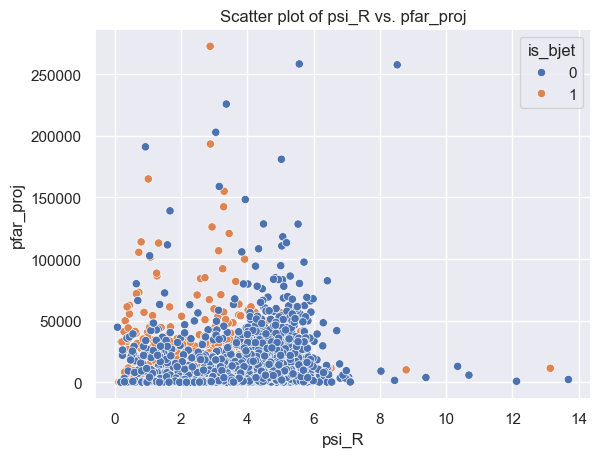

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming bdt_df is your DataFrame with 'psi_R', 'pfar_proj', and 'is_bjet' columns

# Create the scatter plot
sns.scatterplot(data=bdt_df, x='psi_R', y='pfar_proj', hue='is_bjet')

# Add labels and title if necessary
plt.xlabel('psi_R')
plt.ylabel('pfar_proj')
plt.title('Scatter plot of psi_R vs. pfar_proj')

# Show the plot
plt.show()
